# For playing the audio file

In [1]:
from AutoWave.audio_player import AudioPlayer

In [2]:
AudioPlayer('Test_Data/car_horn/107090-1-1-0.wav')

# For converting the audio file format

In [3]:
from AutoWave.audio_conversion import audioConversion

In [4]:
audioConversion('test.mp3','mp3','wav')

CONVERTING: test.mp3
CONVERTED: test.wav


In [5]:
AudioPlayer('test.wav')

# For augumenting one file 

In [6]:
from AutoWave.augumentor import augumentOneFile

In [7]:
augumentOneFile('test.wav','',aug_times=10,noise=False,shift=True,stretch=True,pitch=True)

Converting test.wav
Augmentation Completed


# Code Flow for training the model

In [8]:
from AutoWave.DataLoad import gen_data_from_folder
from AutoWave.Auto_Audio_Classification import Auto_Audio_Classification

In [9]:
dataset_dir = 'Test_Data/'
data = gen_data_from_folder(dataset_dir,get_dataframe=True,label_folder=True)

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2503.91it/s]


In [10]:
data

File_List            Label
0     Test_Data//air_conditioner/100852-0-0-0.wav  air_conditioner
1     Test_Data//air_conditioner/100852-0-0-1.wav  air_conditioner
2    Test_Data//air_conditioner/100852-0-0-10.wav  air_conditioner
3    Test_Data//air_conditioner/100852-0-0-11.wav  air_conditioner
4    Test_Data//air_conditioner/100852-0-0-12.wav  air_conditioner
..                                            ...              ...
96       Test_Data//street_music/101848-9-0-9.wav     street_music
97       Test_Data//street_music/105425-9-0-1.wav     street_music
98      Test_Data//street_music/105425-9-0-10.wav     street_music
99      Test_Data//street_music/105425-9-0-12.wav     street_music
100     Test_Data//street_music/105425-9-0-13.wav     street_music

[101 rows x 2 columns]

# Augument Folder

In [11]:
from AutoWave.augumentor import augumentFolder

In [12]:
augumentFolder(data['File_List'],'augument_data')

 10%|████████                                                                         | 10/101 [00:17<02:36,  1.72s/it]

Please use .wav file


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2523.04it/s]

Augmentation Completed


File_List            Label
0     augument_data/air_conditioner/10100852-0-0-0.wav  air_conditioner
1     augument_data/air_conditioner/10100852-0-0-1.wav  air_conditioner
2    augument_data/air_conditioner/10100852-0-0-10.wav  air_conditioner
3    augument_data/air_conditioner/10100852-0-0-11.wav  air_conditioner
4    augument_data/air_conditioner/10100852-0-0-12.wav  air_conditioner
..                                                 ...              ...
995       augument_data/street_music/9101848-9-0-9.wav     street_music
996       augument_data/street_music/9105425-9-0-1.wav     street_music
997      augument_data/street_music/9105425-9-0-10.wav     street_music
998      augument_data/street_music/9105425-9-0-12.wav     street_music
999      augument_data/street_music/9105425-9-0-13.wav     street_music

[1000 rows x 2 columns]

# For reading the info of a wave file

In [13]:
from AutoWave.WaveInfo import read_file_properties

In [14]:
read_file_properties(data['File_List'][0]) #'file_name','num_channels','sample_rate','bit_depth'

('100852-0-0-0.wav', 2, 44100, 16)

#  For Plotting One File

In [15]:
from AutoWave.plotting import plotOneFile

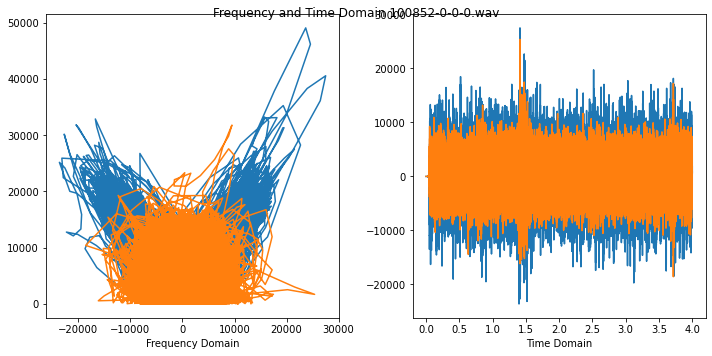

In [16]:
plotOneFile.time_freq_domain(data['File_List'][0])

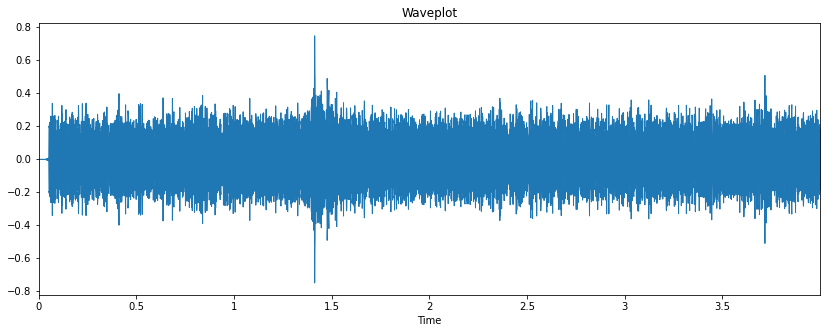

In [17]:
plotOneFile.waveplot(data['File_List'][0])

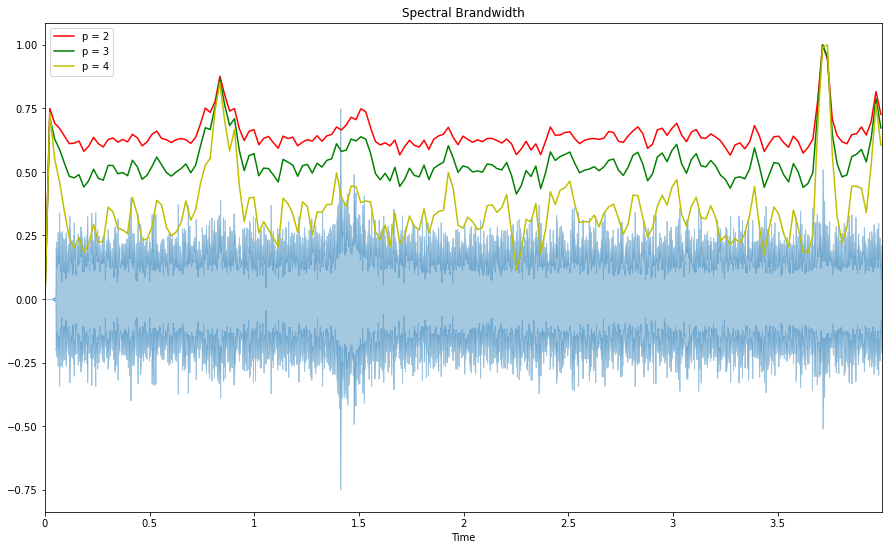

In [18]:
plotOneFile.spectral_brandwidth(data['File_List'][0])

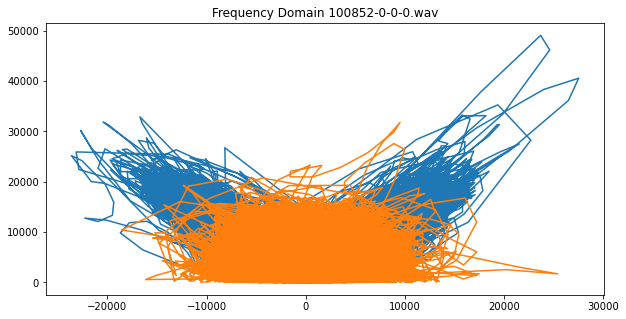

In [19]:
plotOneFile.freq_domain(data['File_List'][0])

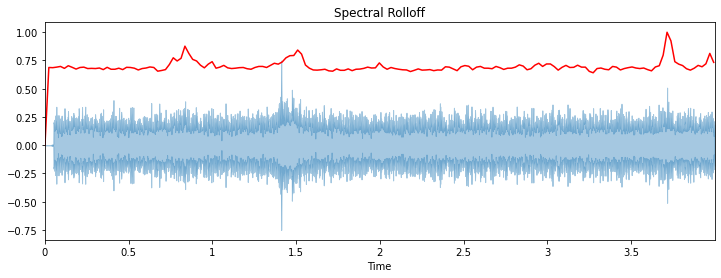

In [20]:
plotOneFile.spectral_rolloff(data['File_List'][0])

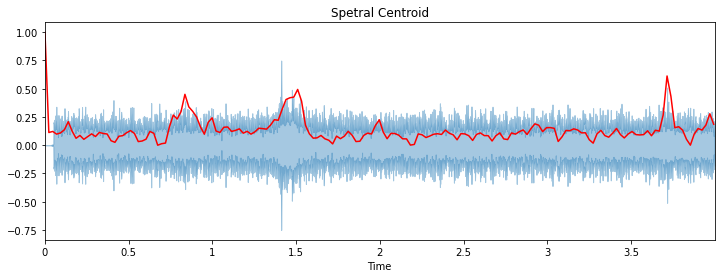

In [21]:
plotOneFile.spectral_centroid(data['File_List'][0])

# For Plotting Multiple Files

In [22]:
from AutoWave.plotting import plotMultipleFile

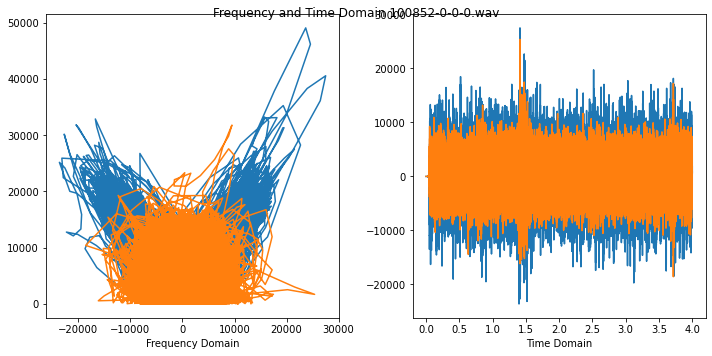

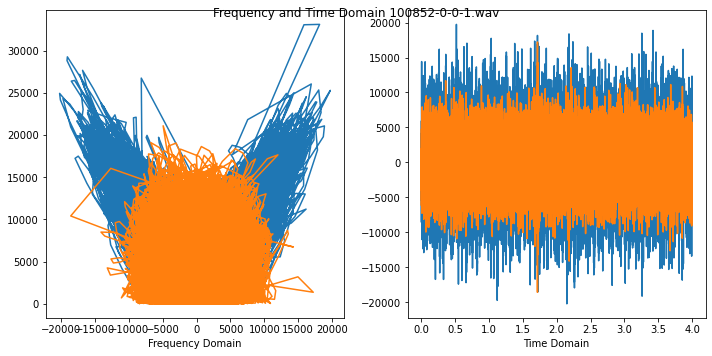

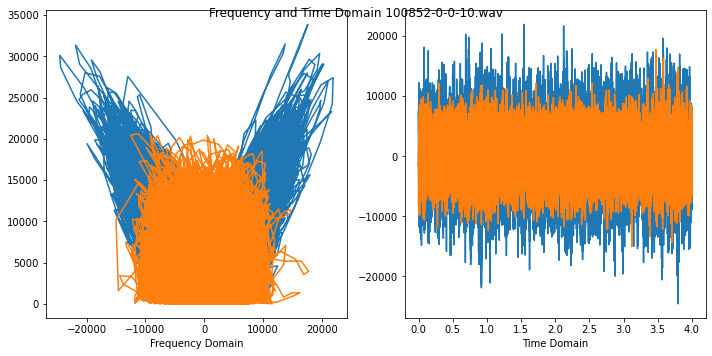

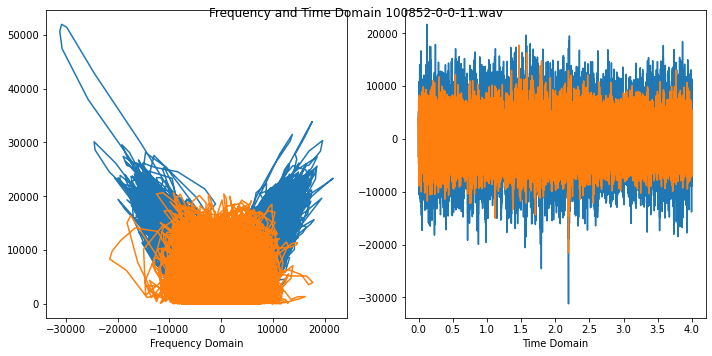

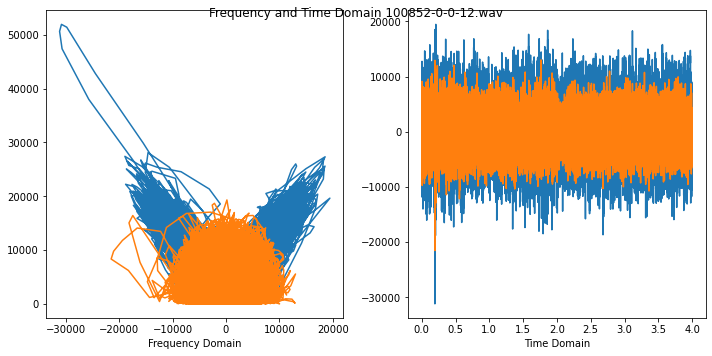

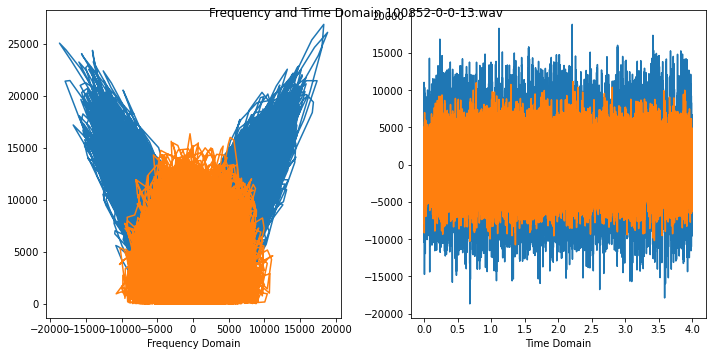

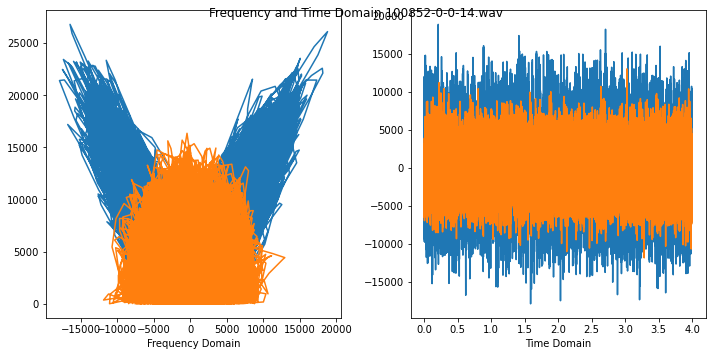

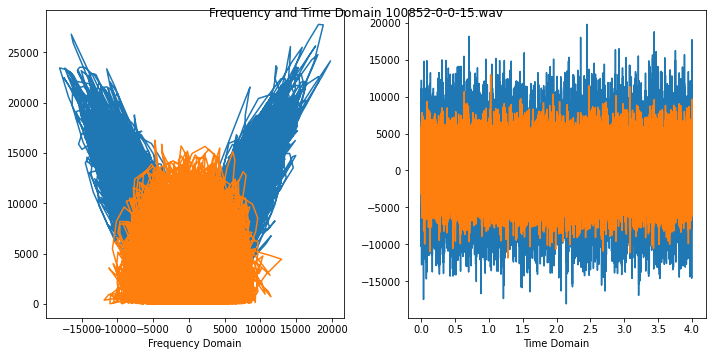

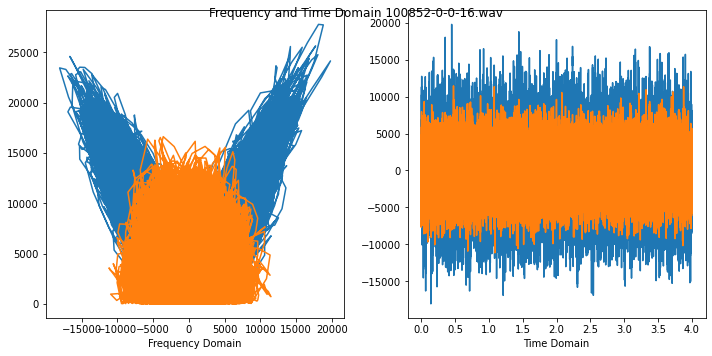

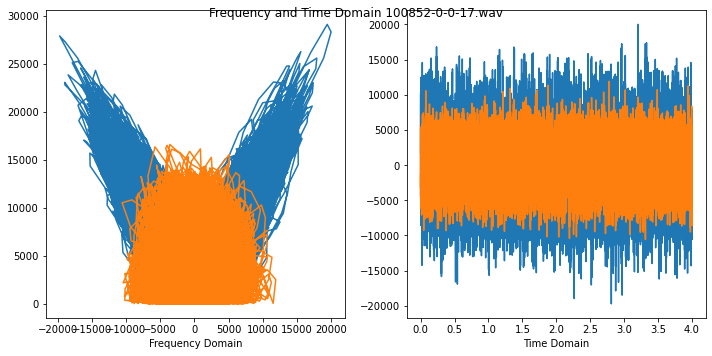

In [23]:
plotMultipleFile.time_freq_domain(data)

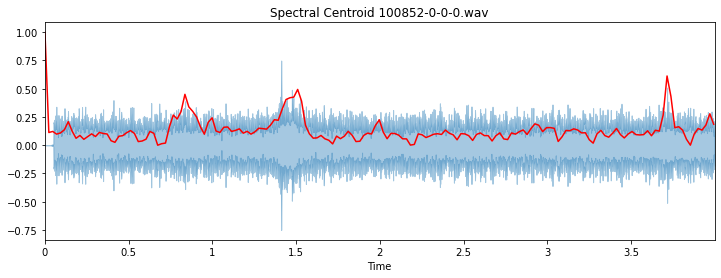

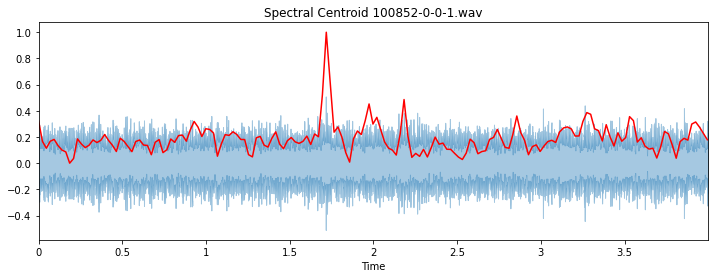

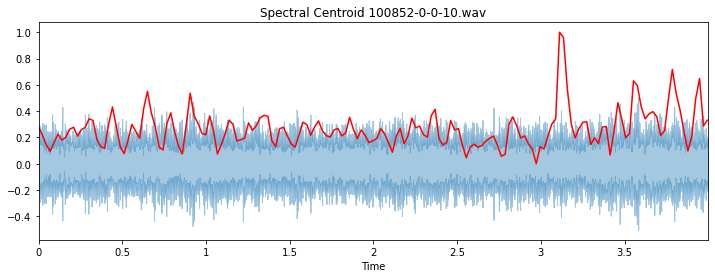

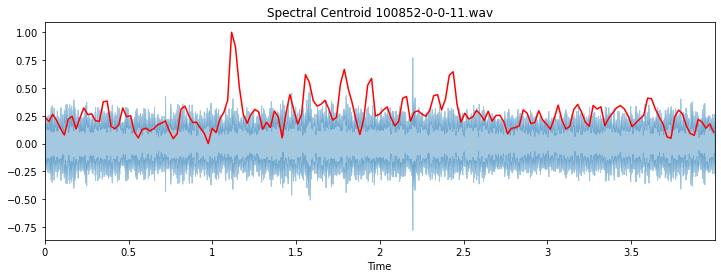

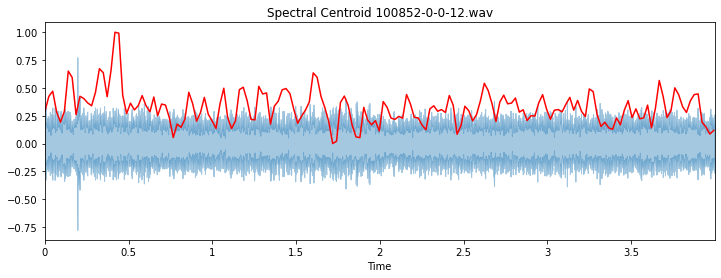

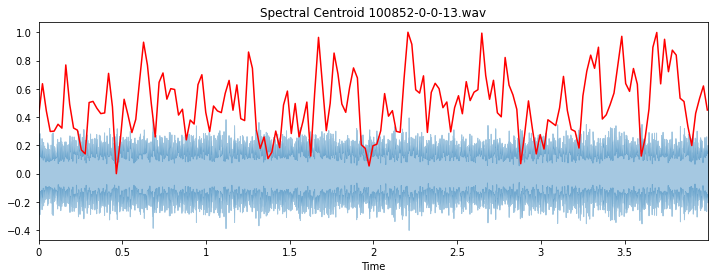

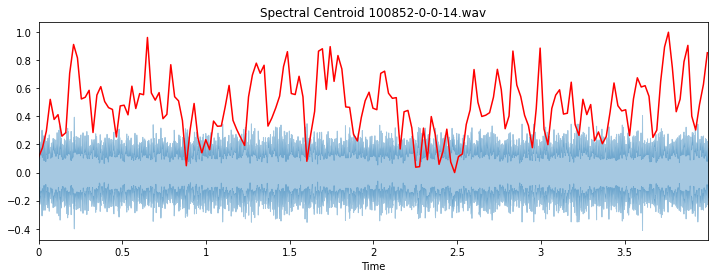

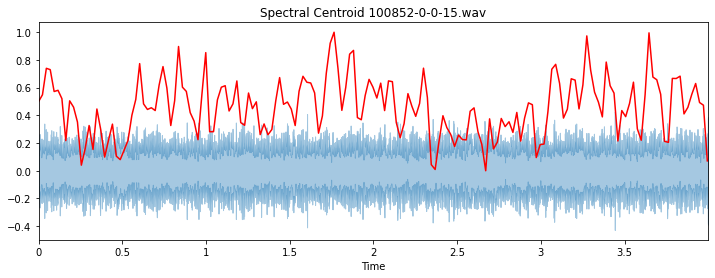

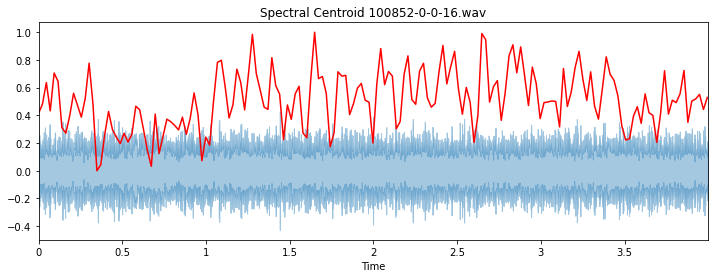

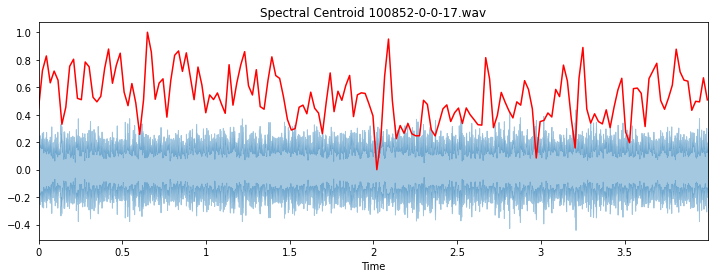

In [24]:
plotMultipleFile.spectral_centroid(data)

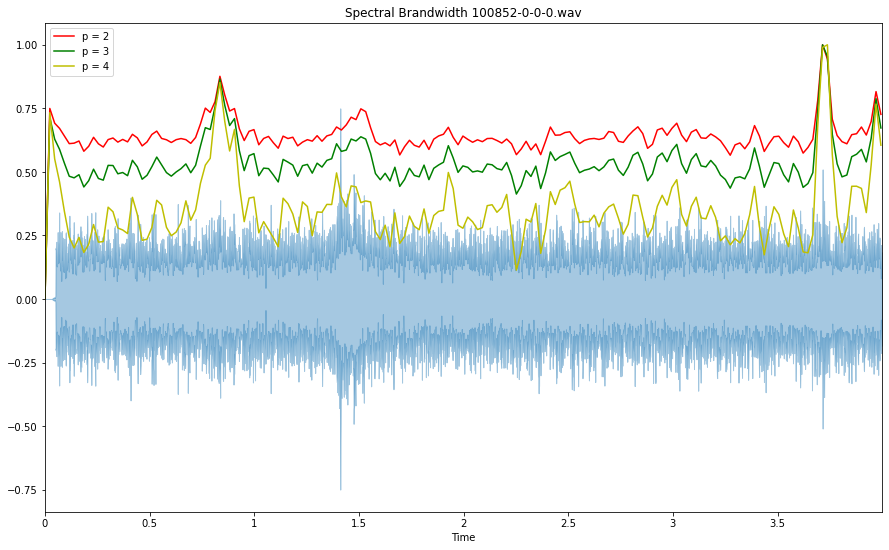

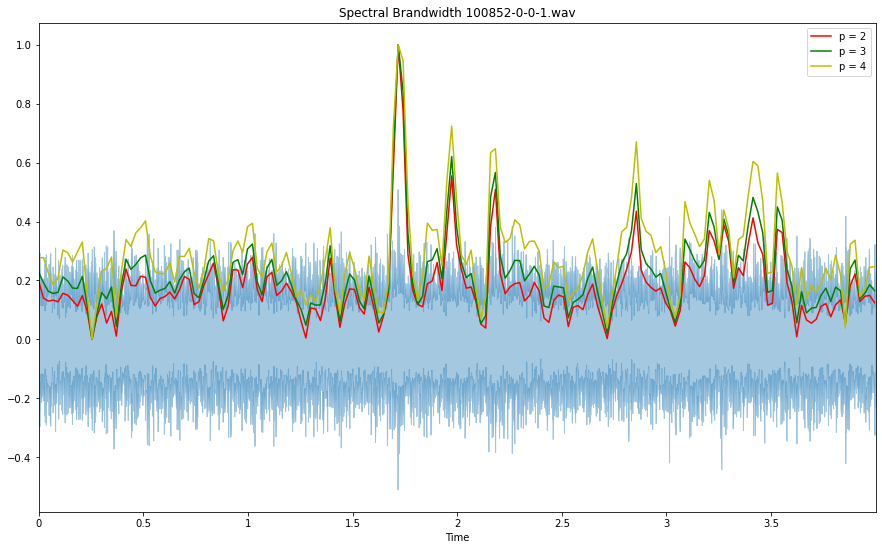

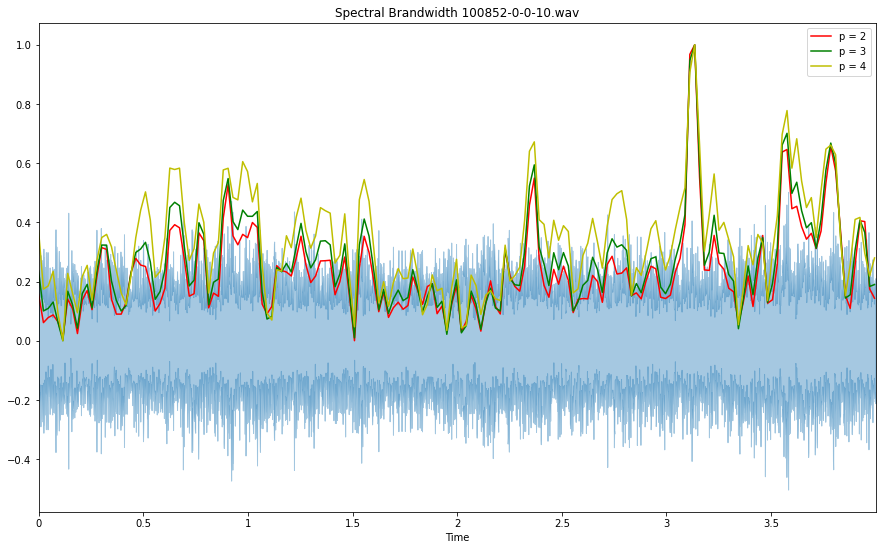

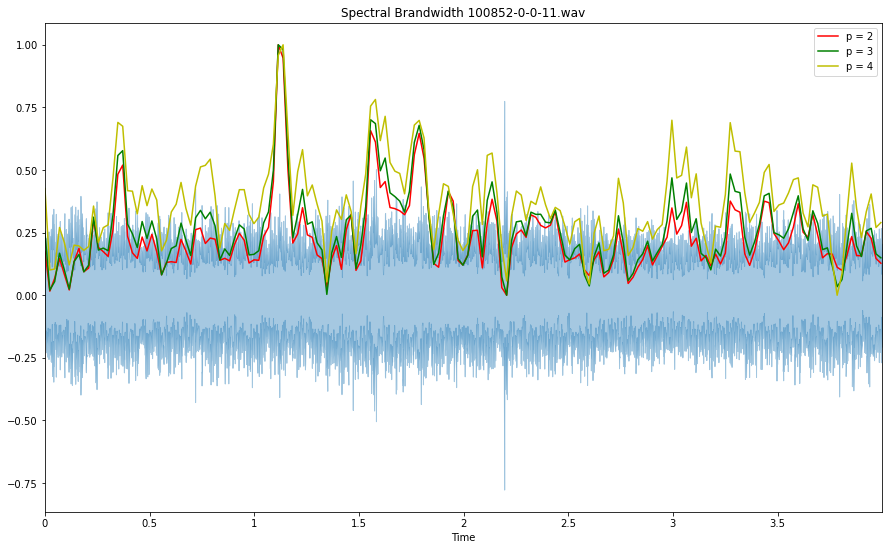

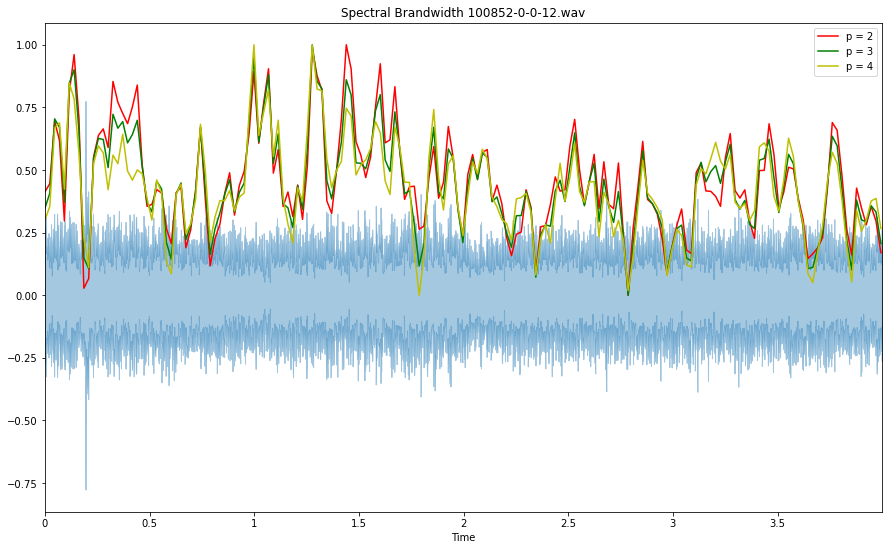

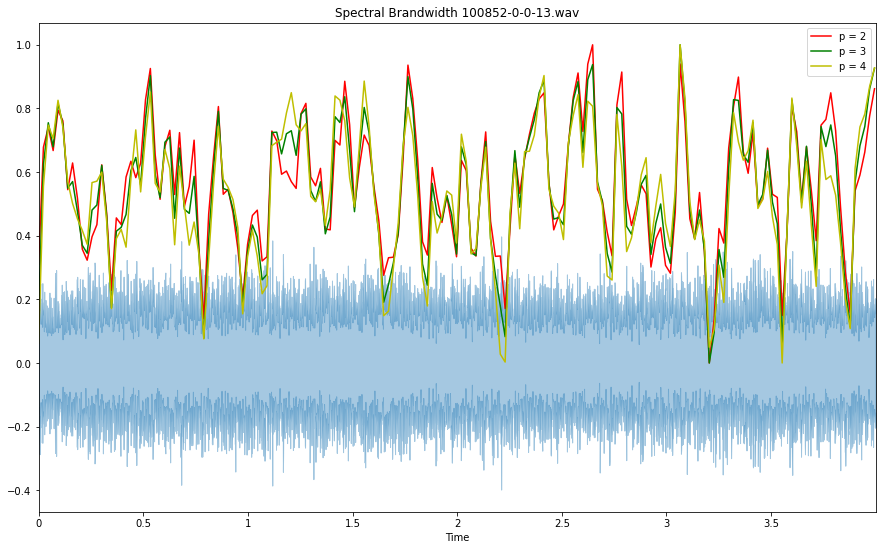

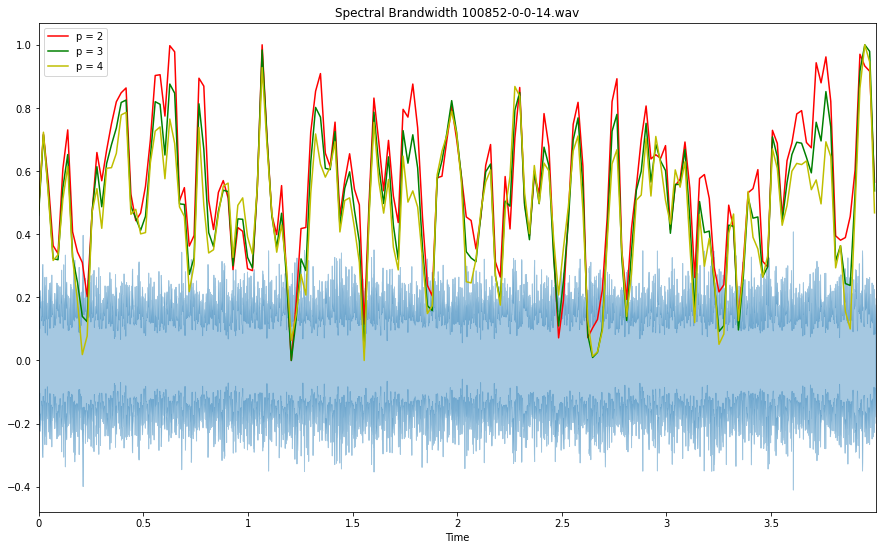

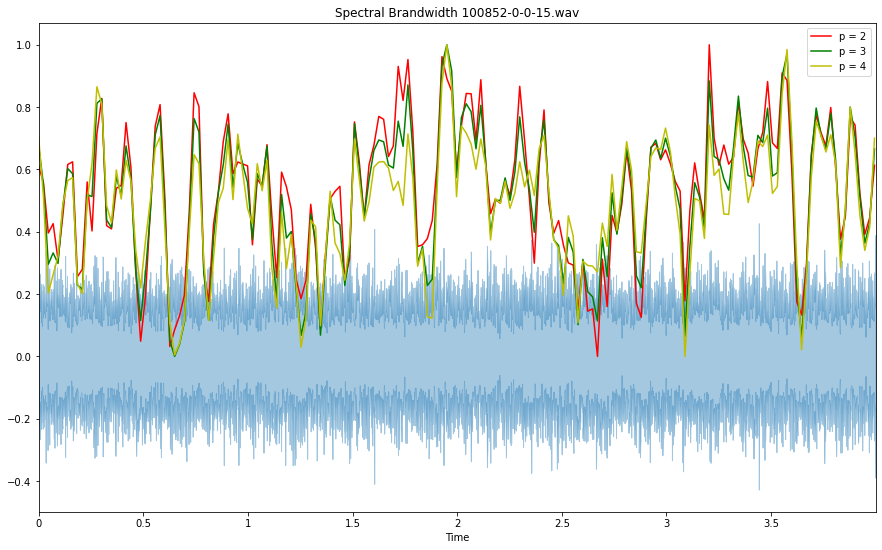

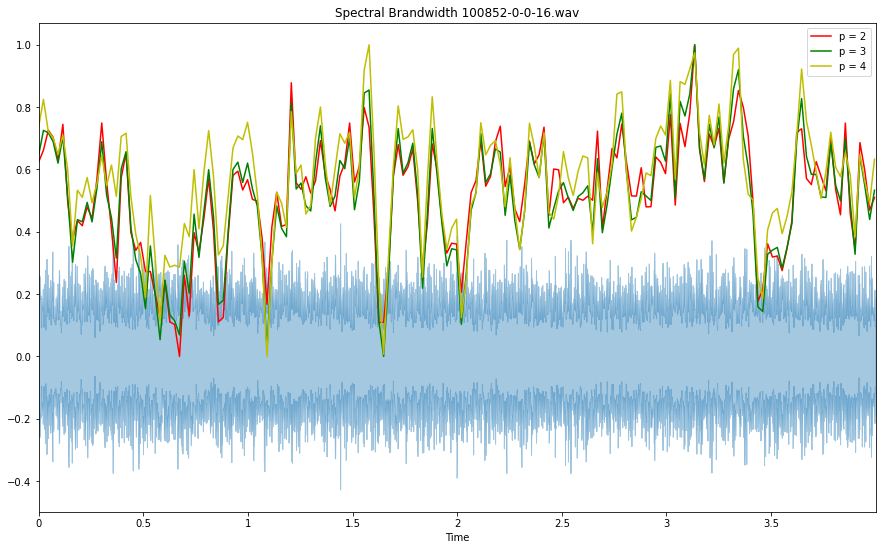

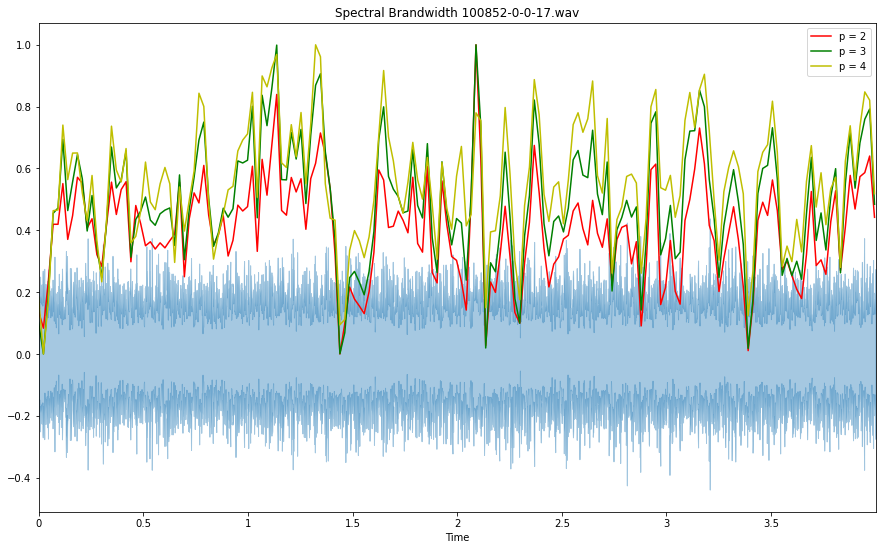

In [25]:
plotMultipleFile.spectral_brandwidth(data)

# Training Models

In [26]:
model = Auto_Audio_Classification(test_size=0.2,label_encoding=True,result_dataframe=False,aug_data=True)

In [27]:
model.fit(data)

 10%|████████                                                                         | 10/101 [00:12<01:51,  1.22s/it]

Please use .wav file


  0%|▍                                                                                | 5/1000 [00:00<00:21, 45.58it/s]

Augmentation Completed


 15%|████████████▎                                                                      | 4/27 [00:04<00:28,  1.25s/it]

Invalid Classifier(s) : CategoricalNB
Error Code: index 1 is out of bounds for axis 1 with size 1


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:11<00:00,  2.40it/s]


'=================================================================='
'Best Model Sorted By Accurcy'
'=================================================================='
                            Model  Acuracy  Sensitivity  Precision   F-Score  \
0            ExtraTreesClassifier    0.775        0.775   0.781135  0.775320   
1          RandomForestClassifier    0.730        0.730   0.741436  0.729050   
2                  LGBMClassifier    0.725        0.725   0.733908  0.724384   
3                   XGBClassifier    0.715        0.715   0.716858  0.712124   
4   QuadraticDiscriminantAnalysis    0.715        0.715   0.830662  0.714551   
5                           NuSVC    0.705        0.705   0.852722  0.748297   
6            KNeighborsClassifier    0.685        0.685   0.711422  0.687246   
7      LinearDiscriminantAnalysis    0.675        0.675   0.832493  0.714628   
8               RidgeClassifierCV    0.670        0.670   0.728834  0.666317   
9               BaggingClassifi

In [31]:
audio_file = 'Test_Data/dog_bark/100652-3-0-1.wav'
model.predict(audio_file)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.39it/s]


array(['dog_bark'], dtype='<U16')